In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


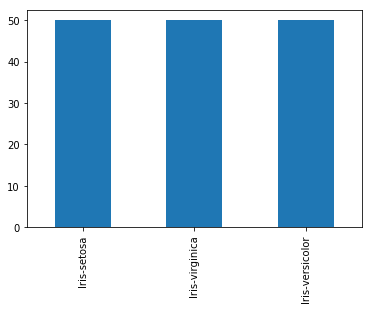

In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
print(df.head())

pd.value_counts(df['Species']).plot.bar()

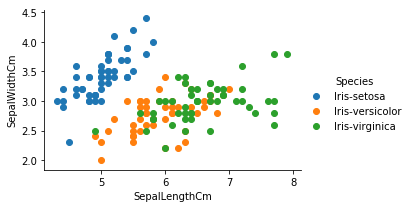

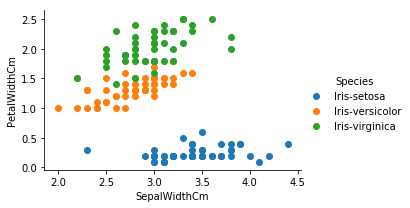

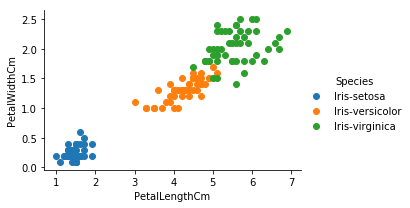

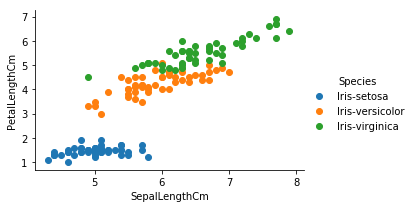

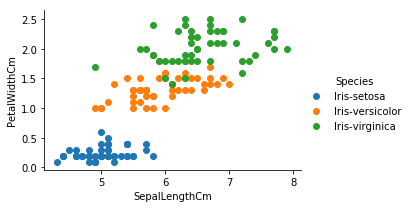

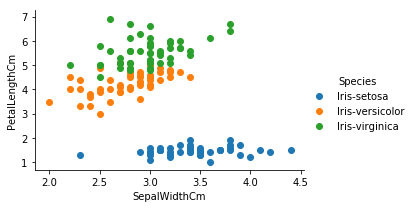

In [3]:
_species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fg = sns.FacetGrid(data=df, hue='Species', hue_order=_species, aspect=1.5)
fg.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
fg = sns.FacetGrid(data=df, hue='Species', hue_order=_species, aspect=1.5)
fg.map(plt.scatter, 'SepalWidthCm', 'PetalWidthCm').add_legend()
fg = sns.FacetGrid(data=df, hue='Species', hue_order=_species, aspect=1.5)
fg.map(plt.scatter, 'PetalLengthCm', 'PetalWidthCm').add_legend()
fg = sns.FacetGrid(data=df, hue='Species', hue_order=_species, aspect=1.5)
fg.map(plt.scatter, 'SepalLengthCm', 'PetalLengthCm').add_legend()
fg = sns.FacetGrid(data=df, hue='Species', hue_order=_species, aspect=1.5)
fg.map(plt.scatter, 'SepalLengthCm', 'PetalWidthCm').add_legend()
fg = sns.FacetGrid(data=df, hue='Species', hue_order=_species, aspect=1.5)
fg.map(plt.scatter, 'SepalWidthCm', 'PetalLengthCm').add_legend()

In [4]:
#shuffle dataset
from sklearn.utils import shuffle
df = shuffle(df)
X = df.iloc[:, [1, 2, 3, 4]]
y = df.iloc[:, [5]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Logistic Regression OVR (One vs Rest)
lr_multiclass = LogisticRegression(random_state=41, multi_class='ovr')
lr_multiclass.fit(X_train, y_train)
y_pred = lr_multiclass.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
#Softmax regression - the higher C, less regularization
softmax_reg = LogisticRegression(multi_class="ovr",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, y_train)
y_pred2 = softmax_reg.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
